# Эффект изменения направления движения

In [1]:
#-ПОДКЛЮЧЕНИЕ-МОДУЛЕЙ-И-БИБЛИОТЕК-
%matplotlib notebook

import numpy              as np
import scipy
import matplotlib.pyplot  as plt
import glob
import moviepy.editor     as mpy
import nbimporter
import CyclicScheme1TransportEquation as schemes

from scipy                import sparse
from scipy.sparse         import linalg
from numpy                import pi, sin, cos, ma
from pylab                import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib           import cm
from matplotlib.ticker    import LinearLocator, FormatStrFormatter
from matplotlib           import animation

### 1.1. Построение графиков теоретических зависимостей $\omega$ и k
$$
\omega = \frac{sin(kh)}{h}\\
\omega = \frac{sin(2kh)-8sin(kh)}{6h}
$$

<IPython.core.display.Javascript object>


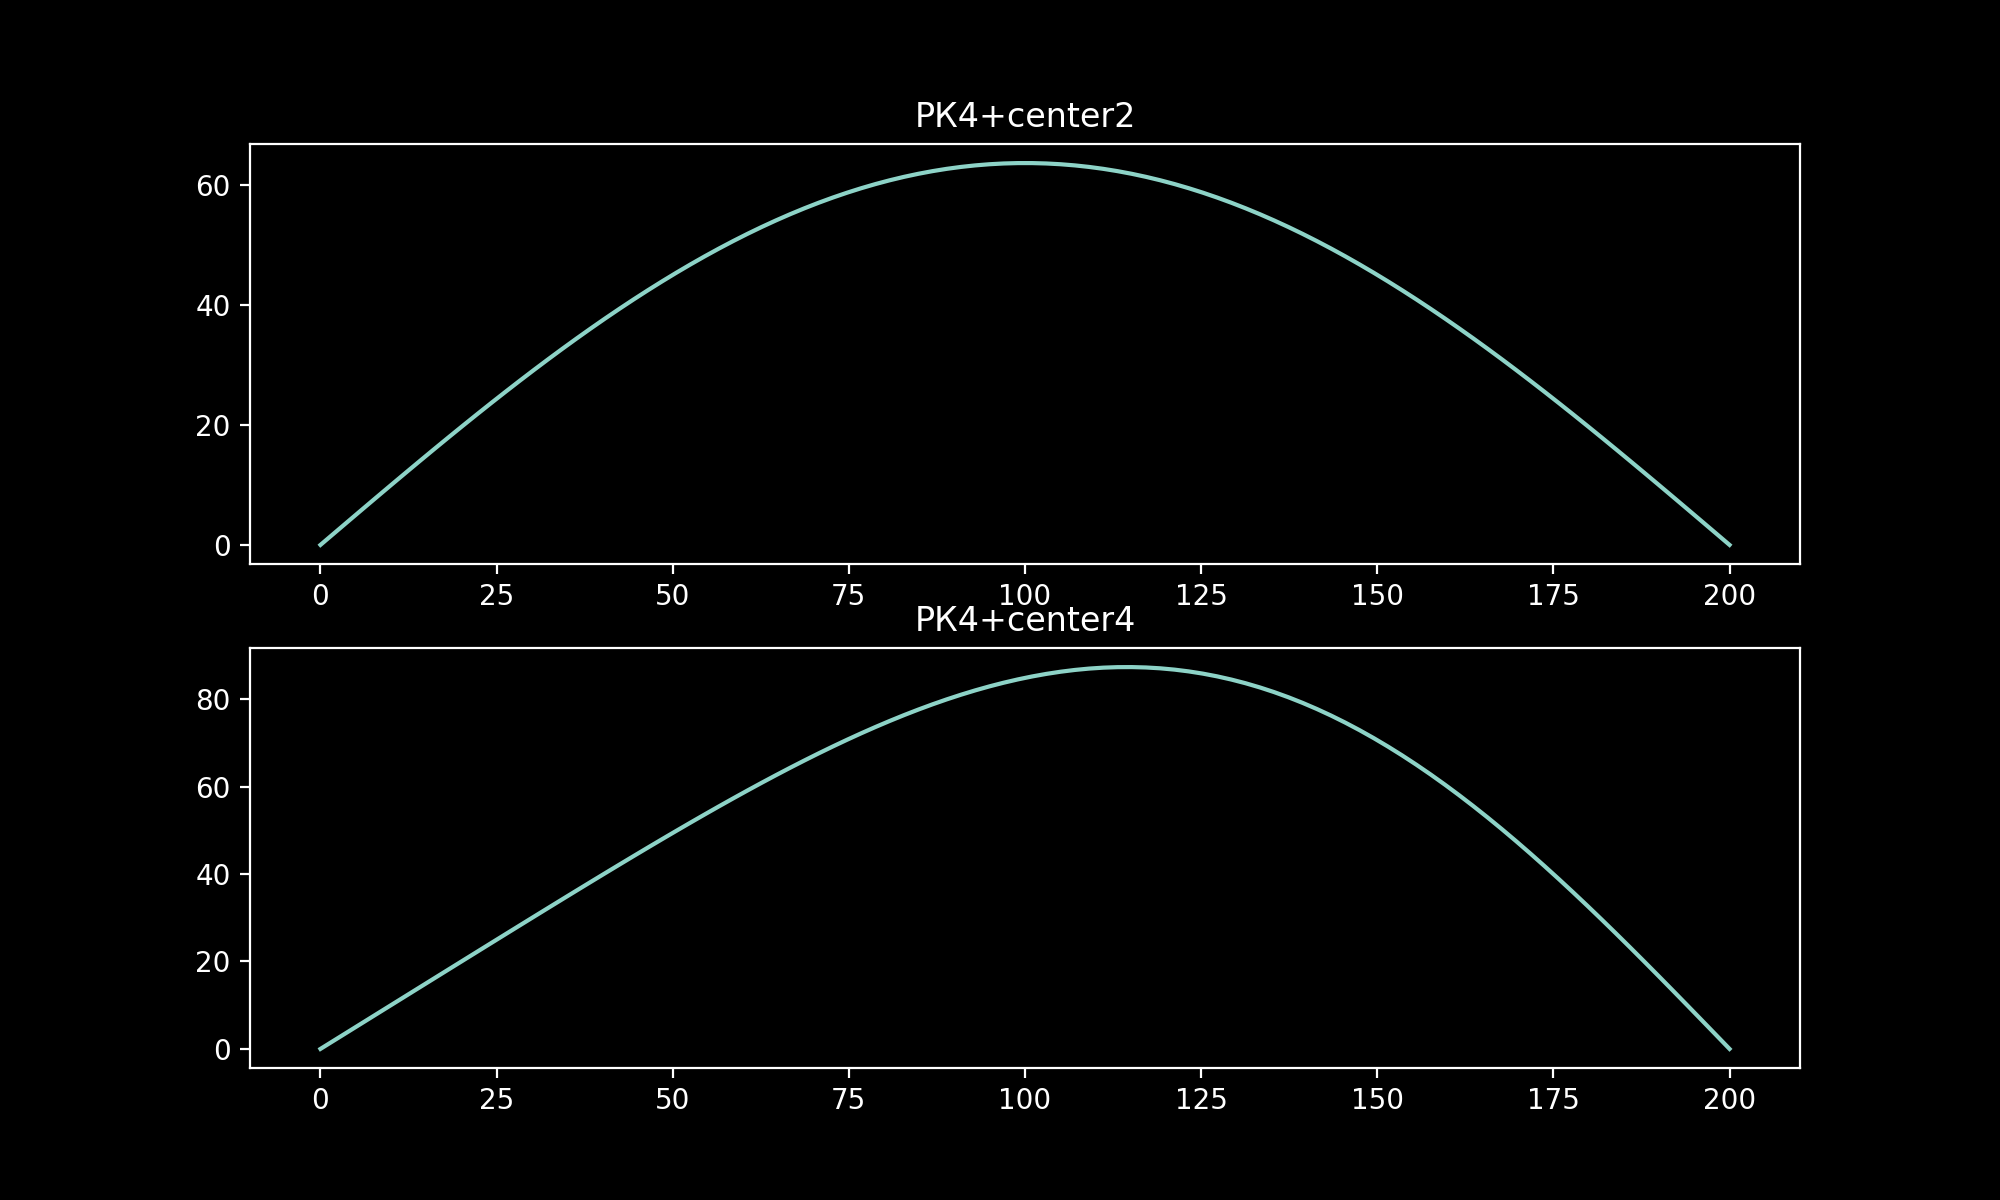

Text(0.5, 1.0, 'РК4+center4')

In [5]:
#-ГРАФИКИ-ЗАВИСИМОСТЕЙ-
h      = 2*pi/400
k      = linspace(0,pi/h,100)

omega1 = sin(k*h)/h
omega2 = -(sin(2*k*h)-8*sin(k*h))/(6*h)

fig, ax = plt.subplots(2)
fig.set_size_inches(10, 6)
plt.style.use('dark_background')

surf = ax[0].plot(k,omega1)
ax[0].set_title('РК4+center2')

surf = ax[1].plot(k,omega2)
ax[1].set_title('РК4+center4')

<IPython.core.display.Javascript object>


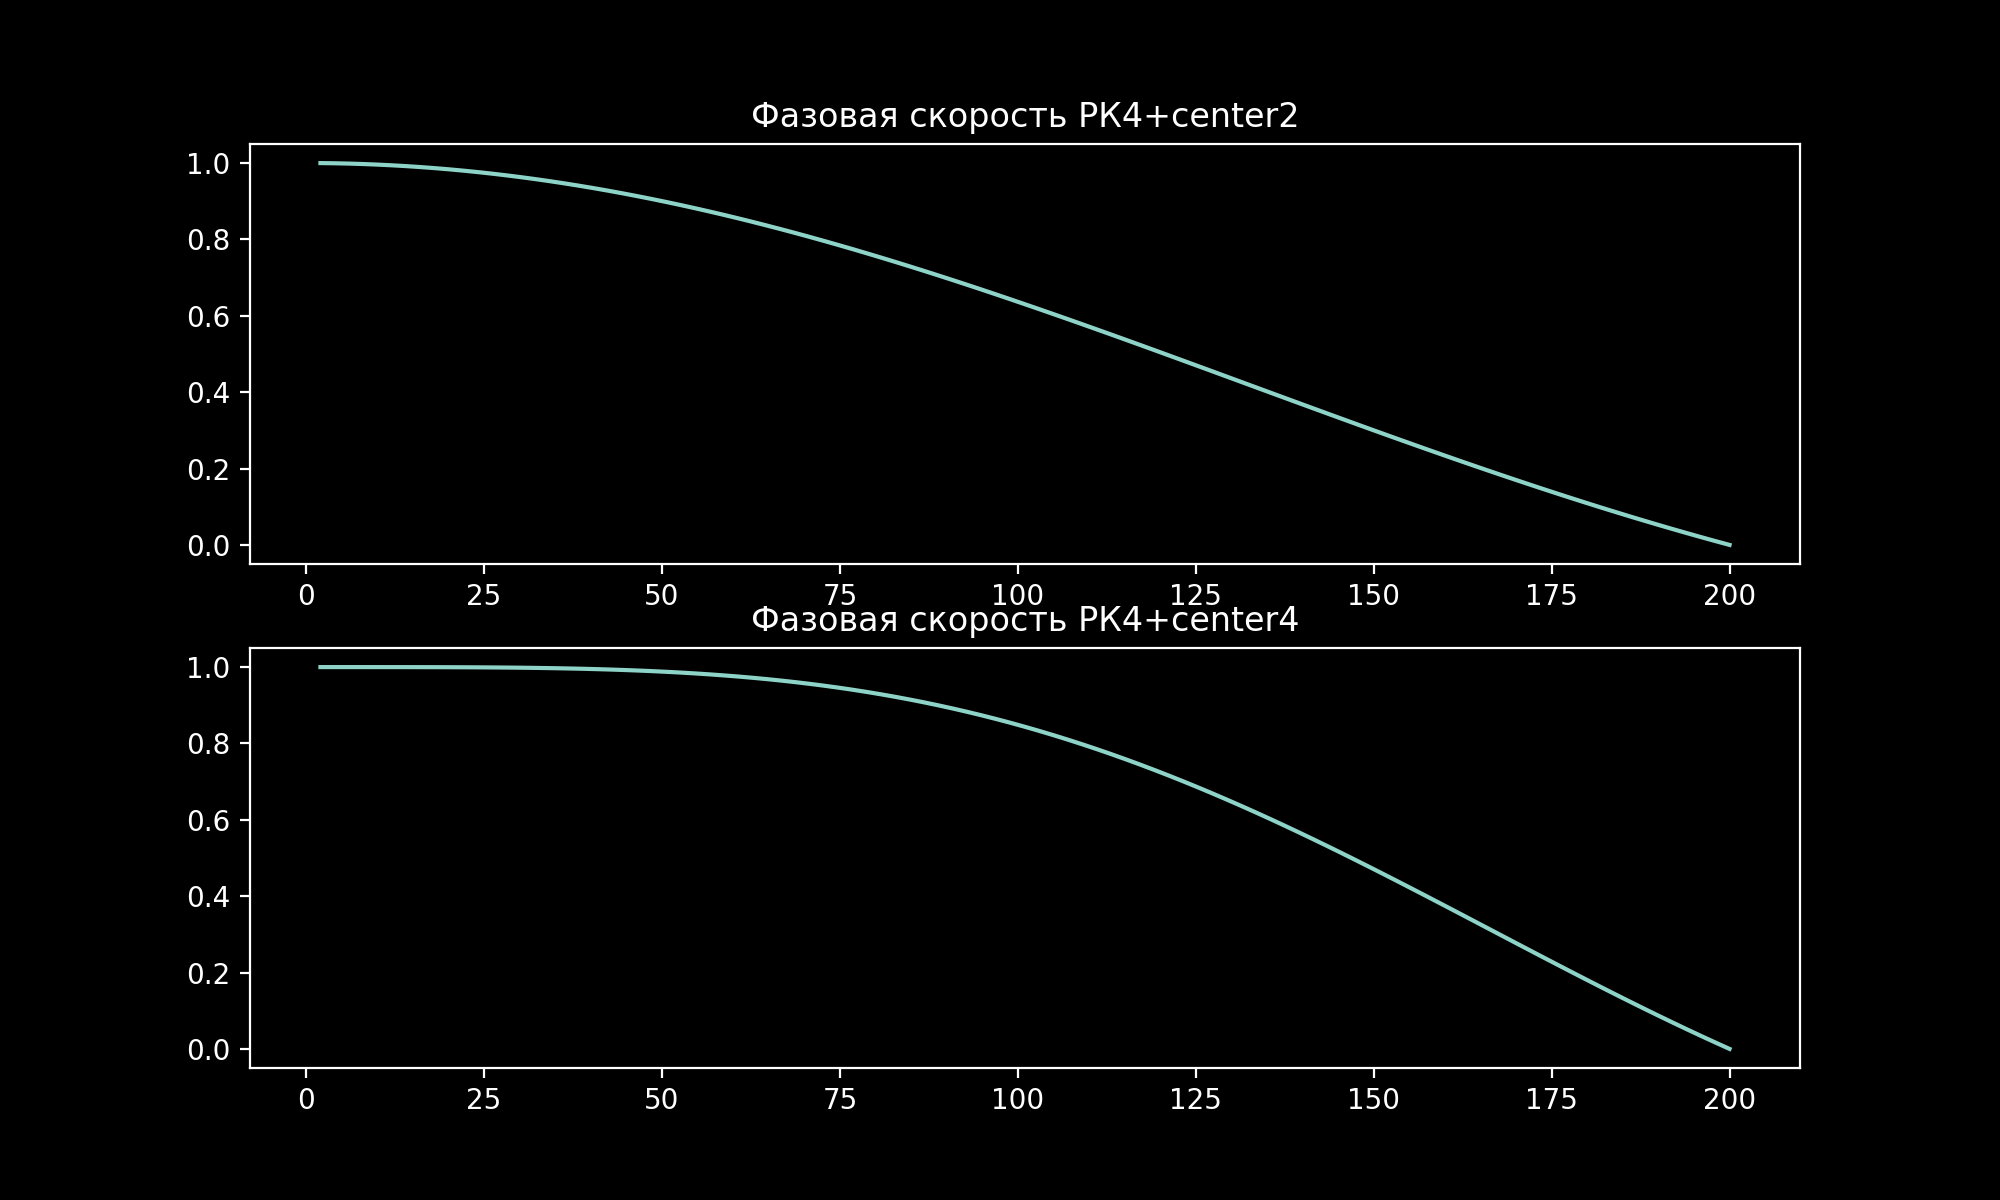

Text(0.5, 1.0, 'Фазовая скорость РК4+center4')

In [6]:
#-ГРАФИКИ-ФАЗОВЫХ-СКОРОСТЕЙ-

h      = 2*pi/400
k      = linspace(0,pi/h,100)

omega1 = sin(k*h)/(k*h)
omega2 = (-sin(2*k*h)+8*sin(k*h))/(6*k*h)

fig, ax = plt.subplots(2)
fig.set_size_inches(10, 6)
plt.style.use('dark_background')

surf = ax[0].plot(k,omega1)
ax[0].set_title('Фазовая скорость РК4+center2')

surf = ax[1].plot(k,omega2)
ax[1].set_title('Фазовая скорость РК4+center4')

<IPython.core.display.Javascript object>


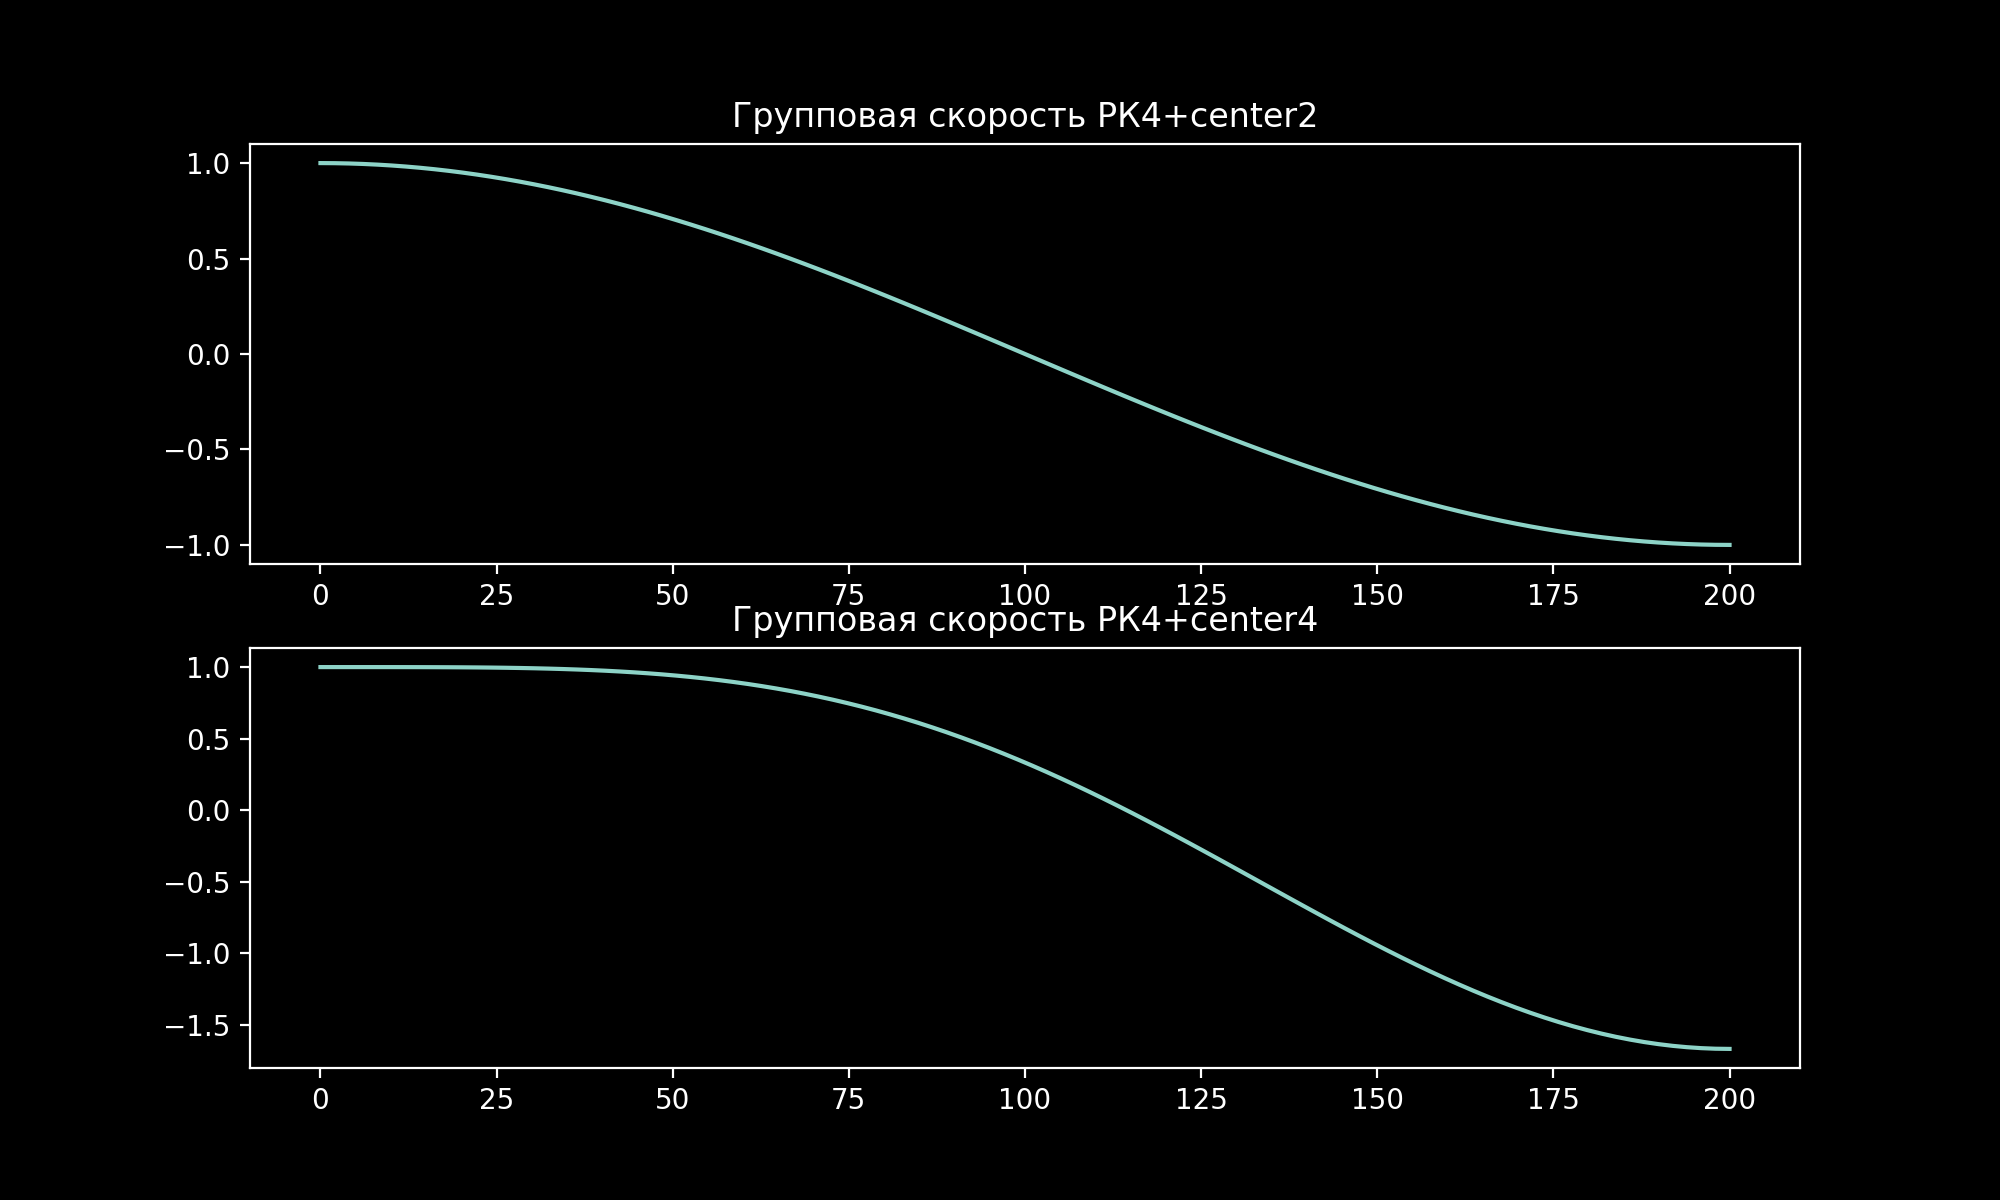

Text(0.5, 1.0, 'Групповая скорость РК4+center4')

In [7]:
#-ГРАФИКИ-ГРУППОВЫХ-СКОРОСТЕЙ-
h      = 2*pi/400
k      = linspace(0,pi/h,100)
omega1 = cos(k*h)
omega2 = (-2*cos(2*k*h)+8*cos(k*h))/(6)

fig, ax = plt.subplots(2)
fig.set_size_inches(10, 6)
plt.style.use('dark_background')

surf = ax[0].plot(k,omega1)
ax[0].set_title('Групповая скорость РК4+center2')

surf = ax[1].plot(k,omega2)
ax[1].set_title('Групповая скорость РК4+center4')

### 1.2. РК4+Center2
* Поведение в близи точек экстремума
* Поведение в удаленной точке с отрицательной производной

##### 1.2.1. Эффект изменения направления движения
В близи точки с отрицательной групповой скоростью

In [8]:
x_max   = 2*pi
t_max   = 2*pi
count_t = 400
count_x = 400
h = x_max/count_x

SC = sin((pi/h-1)*np.arange(0, (count_x), dtype=double)*h)
[x,t,PHI] = schemes.CyclicScheme1TransportEquation('RK4+center2', x_max, t_max, count_x, count_t, 1, SC)

Число Куранта: 
1.0


<IPython.core.display.Javascript object>


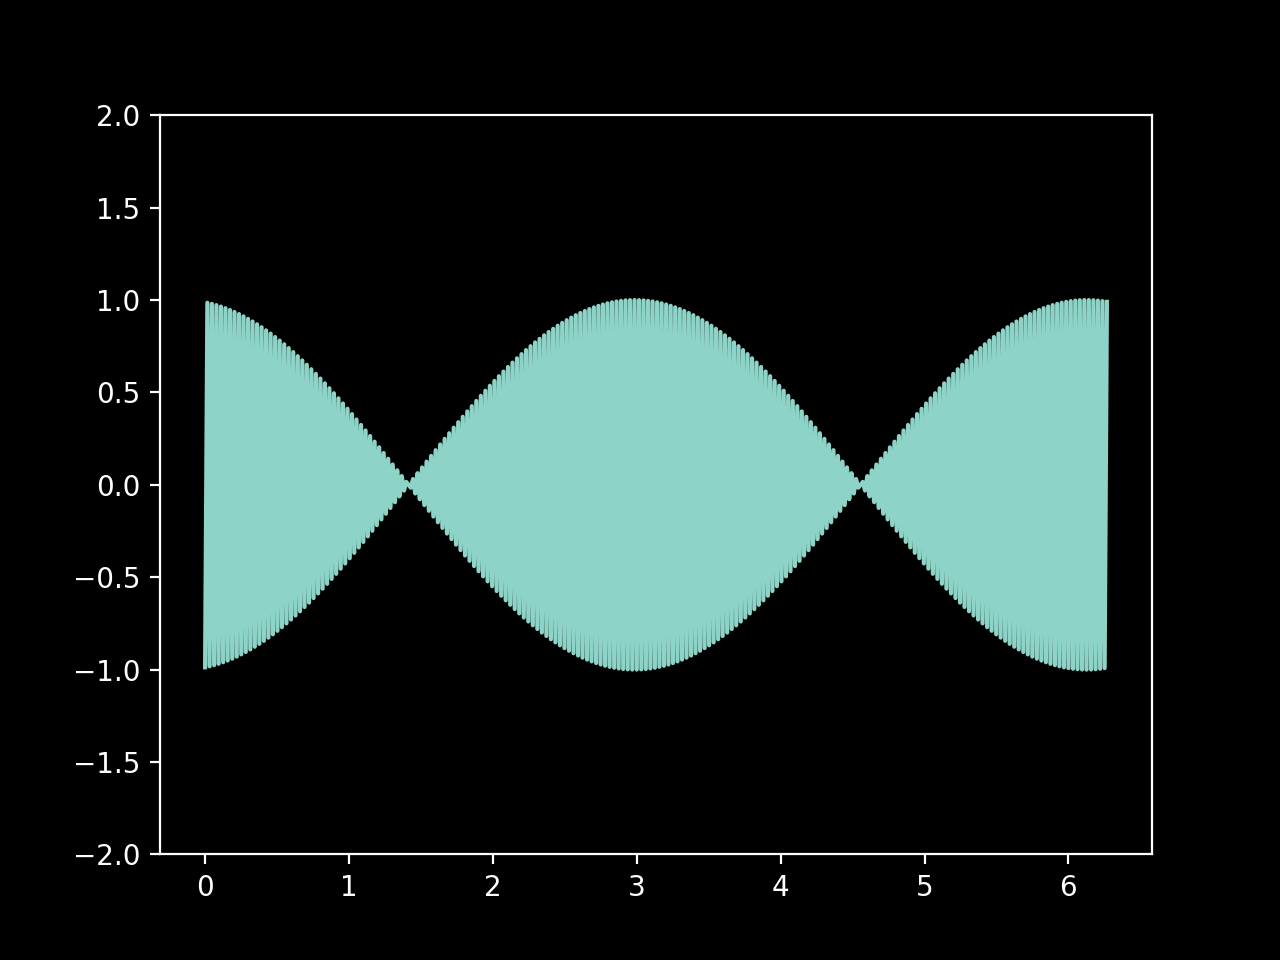

In [9]:
#-ВИЗУАЛИЗАЦИЯ-
fig, ax = plt.subplots()
plt.style.use('dark_background')
surf = ax.plot(x,PHI[0])

def animate(n):
    plt.style.use('dark_background')
    ax.clear()
    ax.set_ylim(-2,2)
    surf = ax.plot(x,PHI[n])
    return surf

anim = animation.FuncAnimation(fig, animate, frames=len(t), interval=1, repeat = False)

##### 1.2.2."Стоячая волна"
В близи нуля групповой скорости

In [22]:
x_max   = 2*pi
t_max   = 2*pi
count_t = 400
count_x = 400
h = x_max/count_x

SC = sin(101*np.arange(0, (count_x), dtype=double)*h)-sin(99*np.arange(0, (count_x), dtype=double)*h)
[x,t,PHI] = schemes.CyclicScheme1TransportEquation('RK4+center2', x_max, t_max, count_x, count_t, 1, SC)

Число Куранта: 
1.0


<IPython.core.display.Javascript object>


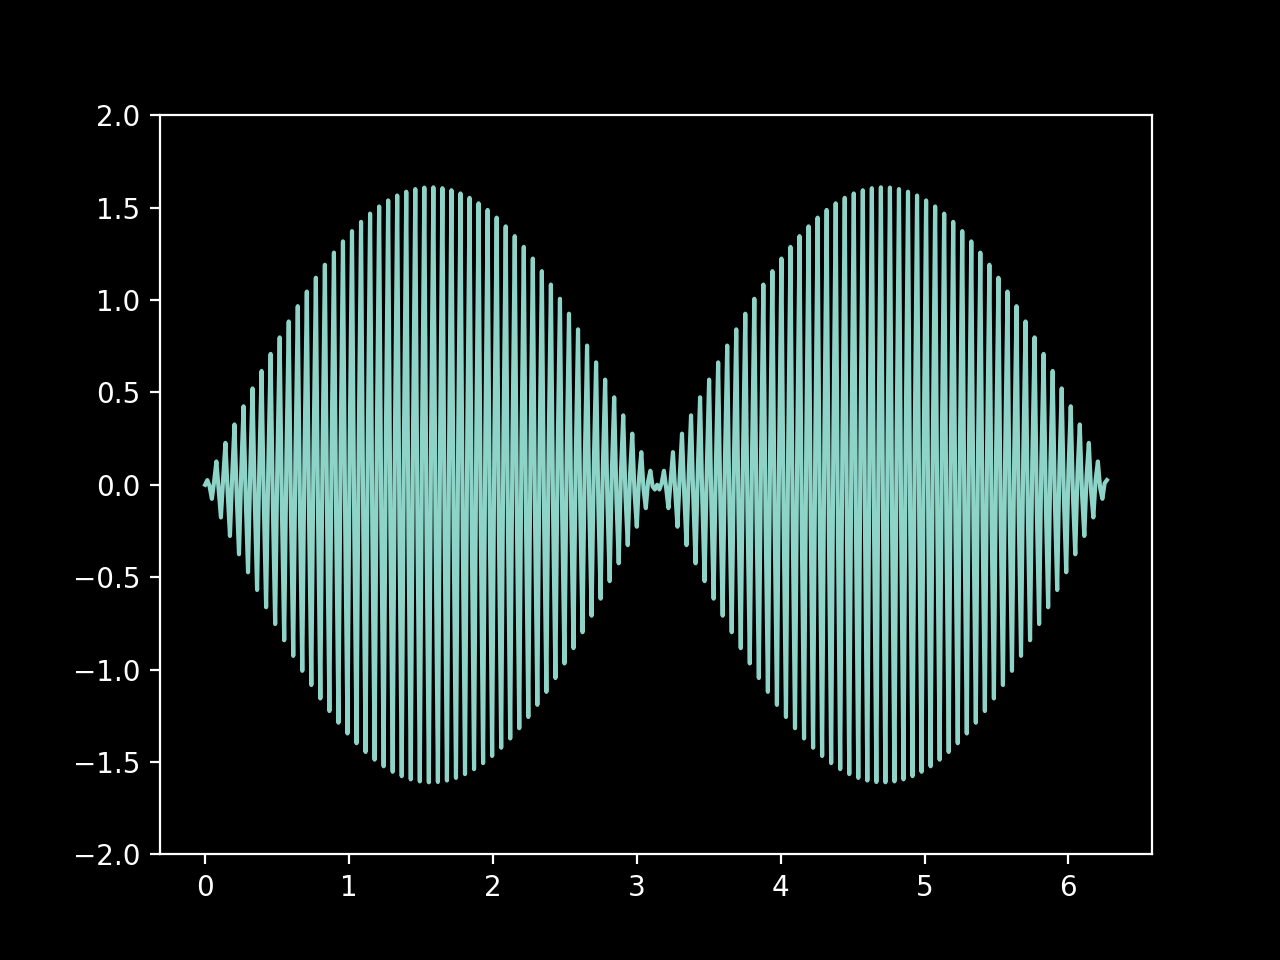

In [23]:
#-ВИЗУАЛИЗАЦИЯ-
fig, ax = plt.subplots()
plt.style.use('dark_background')
surf = ax.plot(x,PHI[0])

def animate(n):
    plt.style.use('dark_background')
    ax.clear()
    ax.set_ylim(-2,2)
    surf = ax.plot(x,PHI[n])
    return surf

anim = animation.FuncAnimation(fig, animate, frames=len(t), interval=1, repeat = False)

### 1.3. РК4+center2
Аналогичное исследование

##### 1.3.1. Эффект изменения направления движения

In [26]:
x_max   = 2*pi
t_max   = 2*pi
count_t = 400
count_x = 400
h = x_max/count_x

SC = sin((pi/h-1)*np.arange(0, (count_x), dtype=double)*h)
[x,t,PHI] = schemes.CyclicScheme1TransportEquation('RK4+center4', x_max, t_max, count_x, count_t, 1, SC)

Число Куранта: 
1.0


<IPython.core.display.Javascript object>


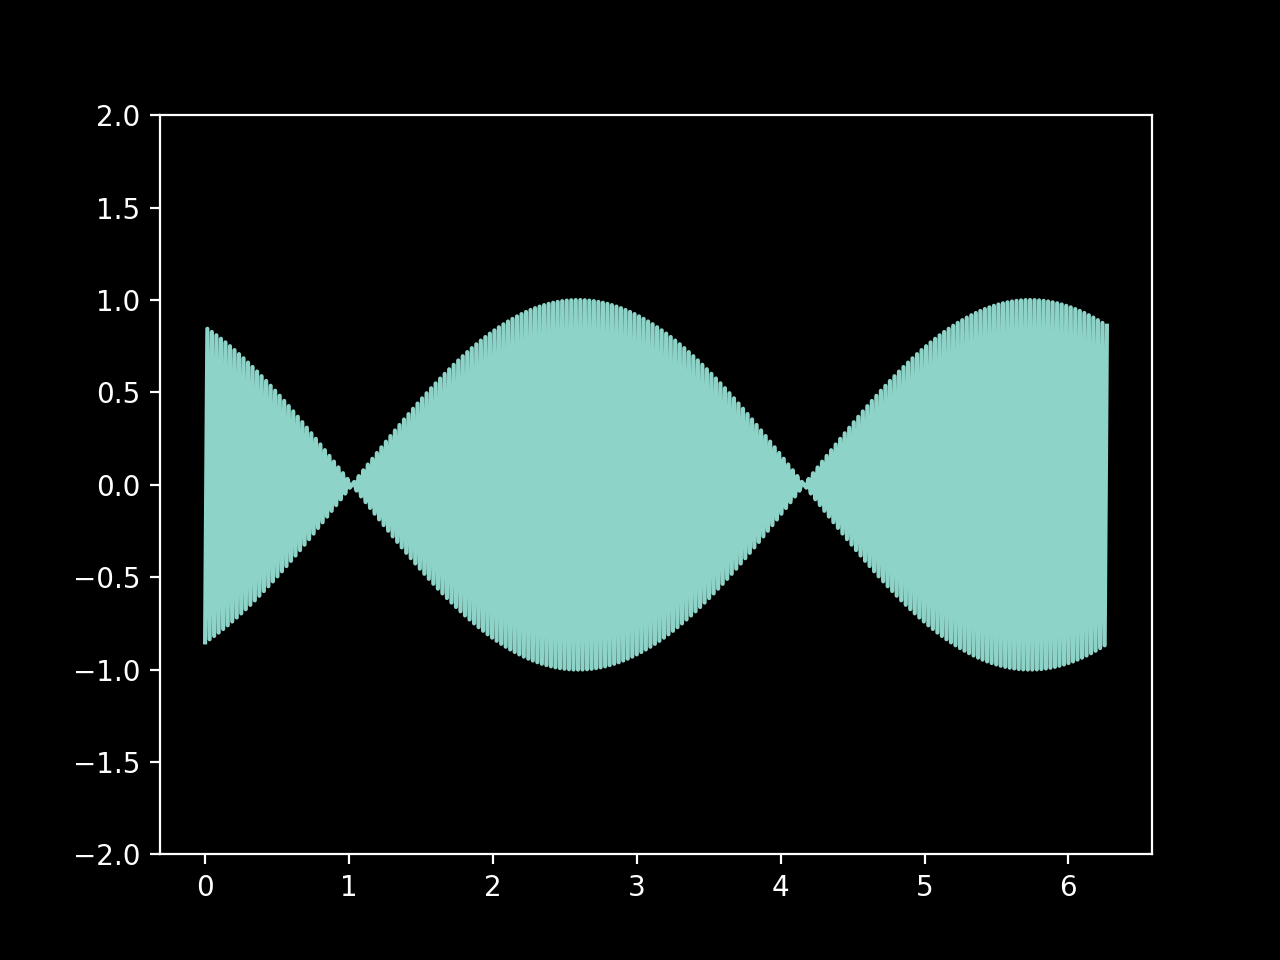

In [27]:
#-ВИЗУАЛИЗАЦИЯ-
fig, ax = plt.subplots()
plt.style.use('dark_background')
surf = ax.plot(x,PHI[0])

def animate(n):
    plt.style.use('dark_background')
    ax.clear()
    ax.set_ylim(-2,2)
    surf = ax.plot(x,PHI[n])
    return surf

anim = animation.FuncAnimation(fig, animate, frames=len(t), interval=1, repeat = False)

##### 1.3.2. Стоячая волна
Внешняя полна начинает двигаться в противоположную скорости сторону

In [32]:
x_max   = 2*pi
t_max   = 2*pi
count_t = 400
count_x = 400
h = x_max/count_x

SC = sin(125*np.arange(0, (count_x), dtype=double)*h) - sin(124*np.arange(0, (count_x), dtype=double)*h)
[x,t,PHI] = schemes.CyclicScheme1TransportEquation('RK4+center4', x_max, t_max, count_x, count_t, 1, SC)

Число Куранта: 
1.0


<IPython.core.display.Javascript object>


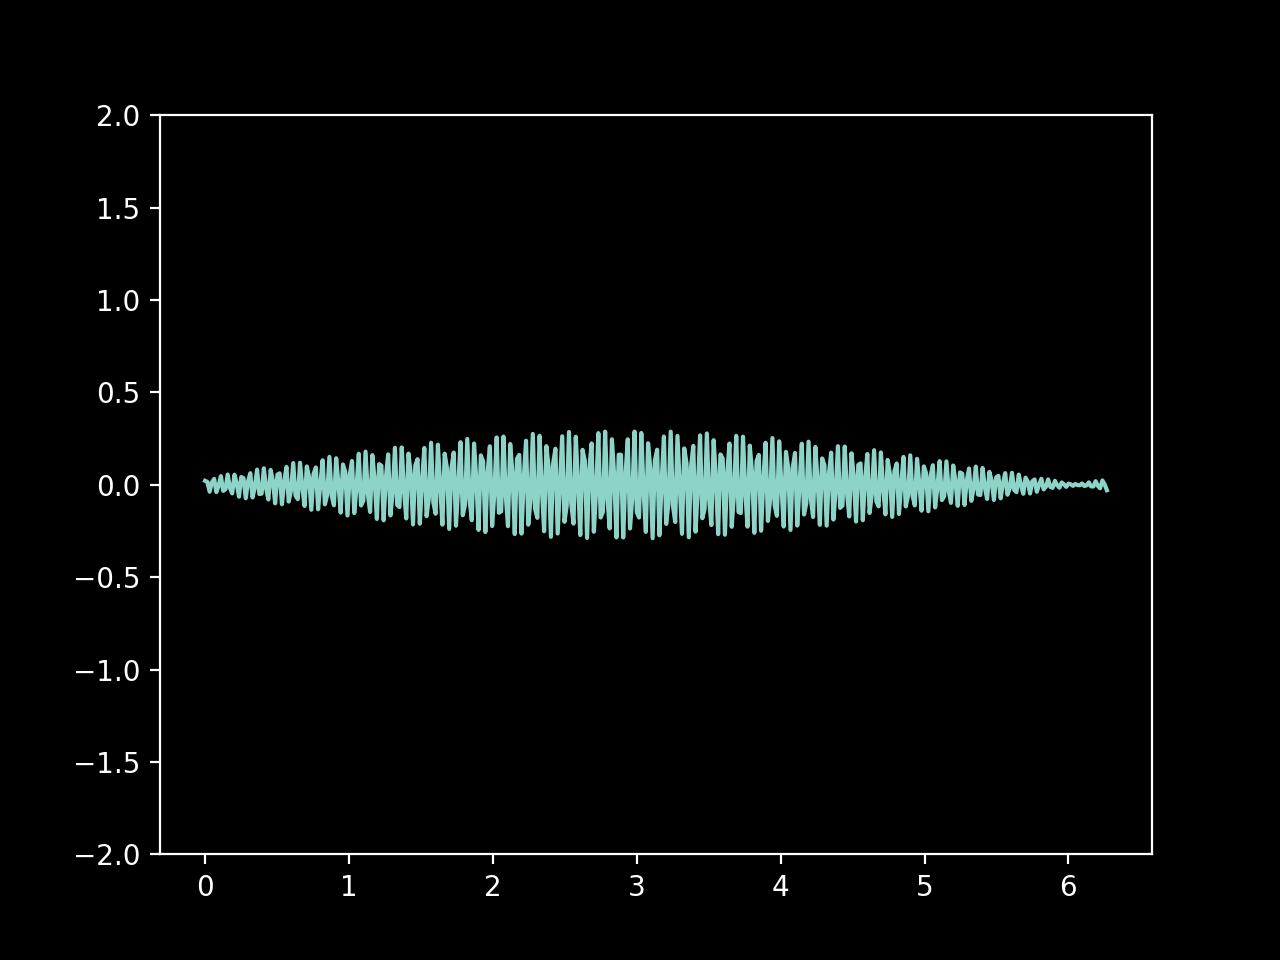

In [33]:
#-ВИЗУАЛИЗАЦИЯ-
fig, ax = plt.subplots()
plt.style.use('dark_background')
surf = ax.plot(x,PHI[0])

def animate(n):
    plt.style.use('dark_background')
    ax.clear()
    ax.set_ylim(-2,2)
    surf = ax.plot(x,PHI[n])
    return surf

anim = animation.FuncAnimation(fig, animate, frames=len(t), interval=1, repeat = False)